# Credit Card Fraud Detection

Objective: Build in predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud.

In [251]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [252]:
#Import the Dataset
CreditFraud = pd.read_csv(r'G:\ML\Datasets\creditcard.csv')

In [253]:
CreditFraud.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [254]:
#Shape of the dataset
CreditFraud.shape

(284807, 31)

In [255]:
#Size of the Dataset
CreditFraud.size

8829017

In [256]:
#Column names
CreditFraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [257]:
#Check for the null values
CreditFraud.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [258]:
CreditFraud.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [259]:
#Get the sense of the data
CreditFraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Observations from the Dataset
1. There are 31 Columns and 284807 rows and there are total of 8829017 of total observations.
2. We have 28 columns which are anonymized / scaled / Transformed.
3. There are 2 columns which are not scaled or transformed. Those are Amount,Time.
4. The data is not uniform means dataset has more Non Fraud Transactions(0) than Fraud transactions(1).
5. Colums have "V" Prefix.
6. Feature "Class" is the Target variable we are predicting by Model Building


In [260]:
NonFraud = round(CreditFraud.Class.value_counts()[0]/len(CreditFraud) *100, 2)
Fraud = round(CreditFraud.Class.value_counts()[1]/len(CreditFraud) *100, 2)
print('Non Fraud Transsactions', str(NonFraud) + '% of DataSet')
print('Fraud Transsactions' , str(Fraud) + '% of DataSet')

Non Fraud Transsactions 99.83% of DataSet
Fraud Transsactions 0.17% of DataSet


99.83% of Dataset contains Non Fraud Transacttion Information and 0.17 % of the dataset has Fraud Transaction Dataset, this is imbalanced dataset and cannot be used to build and train the model because it may lead to overfitting.

Below plot shows how much there is diffrence in count between two categories.

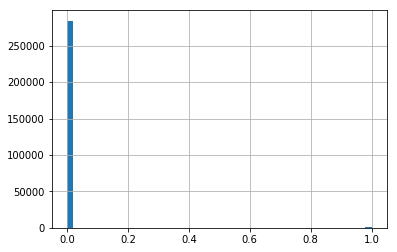

In [261]:
CreditFraud['Class'].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


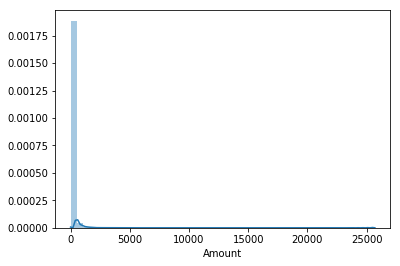

In [262]:
# Checking the Non_ Anonymized Data of Time and Amount
sns.distplot(CreditFraud['Amount'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


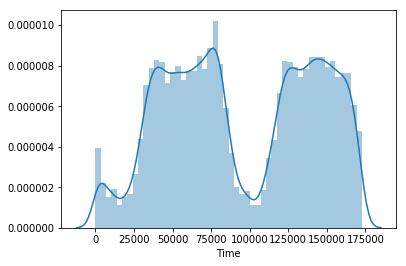

In [263]:
sns.distplot(CreditFraud['Time'])

From the two graphs above we can see that the Amount and Time data is skewed and has to be scaled similar to other features.

In [264]:
#Import necessary Libraries for scaling the two features Time and Amount
from sklearn.preprocessing import StandardScaler, RobustScaler

#Creating an object
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

CreditFraud['preprocess_Amount'] = rob_scaler.fit_transform(CreditFraud['Amount'].values.reshape(-1,1))
CreditFraud['preprocess_Time'] = rob_scaler.fit_transform(CreditFraud['Time'].values.reshape(-1,1))

In [265]:
#Now Drop the original Timee and Amount Features
CreditFraud.drop(columns='Amount',axis=1,inplace=True)
CreditFraud.drop(columns='Time',axis=1,inplace=True)

In [266]:
#Relocate the new created features in the dataset
preprocess_Amount = CreditFraud['preprocess_Amount']
preprocess_Time = CreditFraud['preprocess_Time']

In [267]:
#Drop the original features of scaled values
CreditFraud.drop(columns='preprocess_Amount',axis=1,inplace=True)
CreditFraud.drop(columns='preprocess_Time',axis=1,inplace=True)

In [268]:
#Insert the features to new indexed columns
CreditFraud.insert(0,'preprocess_Amount',preprocess_Amount)
CreditFraud.insert(1,'preprocess_Time',preprocess_Time)

In [269]:
CreditFraud.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset we have is imbalanced , ie most of the transaction information we have is non fraudent and training the model with
this kind of the data may lead to overfitting. So we need to use the techniques of over or undersampling of the dataset to make the data distribution uniform.

For this example we will be using Random Undersampling technique to make the data uniform and then build and train the model.
In undersampling we reduce the count of the label and which has the majority and make its count equal to the label with minority ccount.

In the dataset we have 99.83 % Non Fraud label and .17% Fraud label

In [270]:
# We will use the sample method in pandas dataframe to randomly pick the data from the dataframe
#Shaffling of dataframe before creating dataframe
CreditFraud = CreditFraud.sample(frac=1)

In [271]:
#Taking 136 samples of non fraud transactions out of 43701 transactions
Non_FraudTrans = CreditFraud.loc[CreditFraud['Class'] == 0][:492]
FraudTrans = CreditFraud.loc[CreditFraud['Class'] == 1]
UniformlyDistributeddf = pd.concat([Non_FraudTrans,FraudTrans])

In [272]:
#Shuffle the New DataFrame
df =UniformlyDistributeddf.sample(frac=1,random_state=21)
df.head(5)

,preprocess_Amount,preprocess_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
15781,1.089779,-0.675208,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,...,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1
96341,1.062111,-0.222794,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,...,0.273799,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1
154676,-0.275554,0.209706,-1.456876,3.740306,-7.404518,7.440964,-1.549878,-1.661697,-5.757213,1.615011,...,0.529557,0.957897,0.145339,-0.044704,-0.544962,-0.757757,-0.005352,0.318152,-0.323554,1
255556,-0.296653,0.852830,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.562030,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1
186468,-0.097953,0.498420,2.185686,-0.635076,-1.589477,-1.015906,0.020485,0.234428,-0.979197,0.061379,...,0.178888,0.230180,0.759415,-0.011173,-0.362736,0.019812,-0.081877,0.027914,-0.022711,0


In [273]:
df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

We can see the dataset after undersampling to be more uniform and the skewness is also reduced. 

In [274]:
corr = df.corr()
corr.Class.sort_values(ascending=False)

Class                1.000000
V4                   0.707193
V11                  0.676730
V2                   0.487729
V19                  0.261866
V20                  0.149104
V21                  0.126208
V28                  0.091118
V27                  0.089752
V26                  0.080321
V8                   0.052502
preprocess_Amount    0.040733
V22                  0.035310
V25                 -0.014188
V15                 -0.015902
V23                 -0.030724
V13                 -0.059942
V24                 -0.105590
preprocess_Time     -0.164552
V5                  -0.371046
V6                  -0.386533
V1                  -0.439462
V18                 -0.468669
V7                  -0.477107
V3                  -0.553898
V9                  -0.556452
V17                 -0.559383
V16                 -0.591162
V10                 -0.619606
V12                 -0.674626
V14                 -0.742627
Name: Class, dtype: float64

From the above correlation data it is seen that features V2,V4,V11 are highly correlated and features V10, V12, V14 are negatively correlated.

As we can see V4, V11,V2 features are Positively correlated and features V10,V12,V14 are Negatively Correlated.

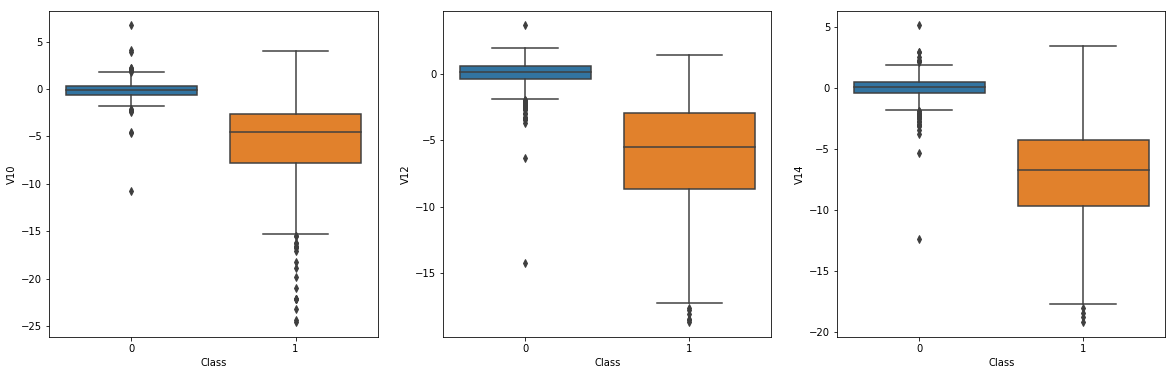

In [275]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x='Class',y='V10',ax=ax1, data=df)
sns.boxplot(x='Class',y='V12',ax=ax2, data=df)
sns.boxplot(x='Class',y='V14',ax=ax3, data=df)

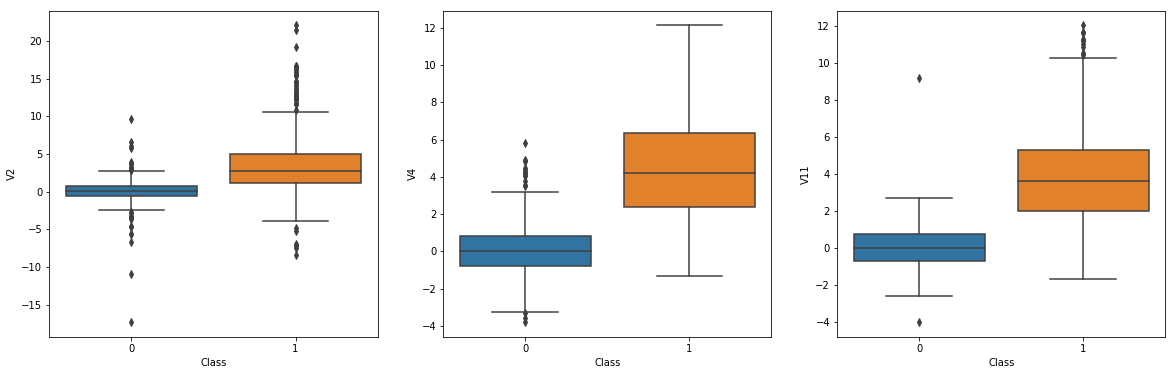

In [276]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x='Class',y='V2',ax=ax1, data=df)
sns.boxplot(x='Class',y='V4',ax=ax2, data=df)
sns.boxplot(x='Class',y='V11',ax=ax3, data=df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'V14 Distribution \n (Fraud Transactions)')

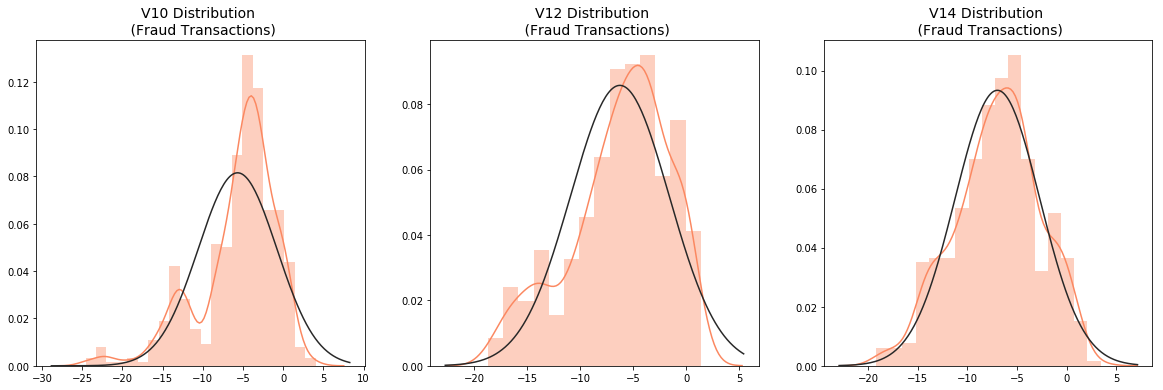

In [277]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax3, fit=norm, color='#FB8861')
ax3.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

In [278]:
print('V10 Removing Outliers ,(Highest Negative Correlated with Labels)')
print('\n')
v10_fraud = df['V10'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75 - q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * 2.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('Cut Off: {}'.format(v10_cut_off))
print('v10 Lower: {}'.format(v10_lower))
print('v10 Upper: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature v10 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('v10 outliers:{}'.format(outliers))


print('--'*40)
print('V12 Removing Outliers ,(Highest Negative Correlated with Labels)')
print('\n')

#V12 Removing Outliers (Highest Negative Correlated with Labels)
v12_fraud = df['V12'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('v12 Lower: {}'.format(v12_lower))
print('v12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature v12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('v12 outliers:{}'.format(outliers))
print('--'*40)
print('V14 Removing Outliers ,(Highest Negative Correlated with Labels)')
print('\n')

v14_fraud = df['V14'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('v14 Lower: {}'.format(v14_lower))
print('v14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature v14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('v14 outliers:{}'.format(outliers))

print('--'*40)


df = df.drop(df[(df['V10'] > v10_upper) | (df['V10'] < v10_lower)].index)
df = df.drop(df[(df['V12'] > v12_upper) | (df['V12'] < v12_lower)].index)
df = df.drop(df[(df['V14'] > v14_upper) | (df['V14'] < v14_lower)].index)


V10 Removing Outliers ,(Highest Negative Correlated with Labels)


Quartile 25: -7.7566982278474725 | Quartile 75: -2.6141839131895623
iqr: 5.142514314657911
Cut Off: 12.856285786644776
v10 Lower: -20.61298401449225
v10 Upper: 10.242101873455214
Feature v10 Outliers for Fraud Cases: 8
v10 outliers:[-23.2282548357516, -22.1870885620007, -24.403184969972802, -22.1870885620007, -22.1870885620007, -24.5882624372475, -20.949191554361104, -22.1870885620007]
--------------------------------------------------------------------------------
V12 Removing Outliers ,(Highest Negative Correlated with Labels)


Quartile 25: -8.688176521812306 | Quartile 75: -2.9740880253849302
iqr: 5.714088496427376
Cut Off: 8.571132744641064
v12 Lower: -17.25930926645337
v12 Upper: 5.597044719256134
Feature v12 Outliers for Fraud Cases: 6
v12 outliers:[-17.631606313870698, -18.047596570821604, -18.4311310279993, -18.553697009645802, -18.683714633344298, -17.7691434633638]
--------------------------------------------

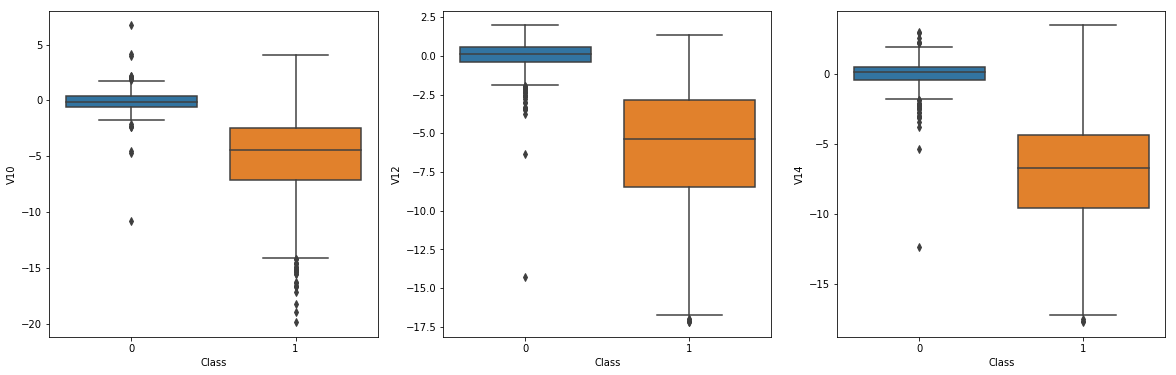

In [279]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x='Class',y='V10',ax=ax1, data=df)
sns.boxplot(x='Class',y='V12',ax=ax2, data=df)
sns.boxplot(x='Class',y='V14',ax=ax3, data=df)

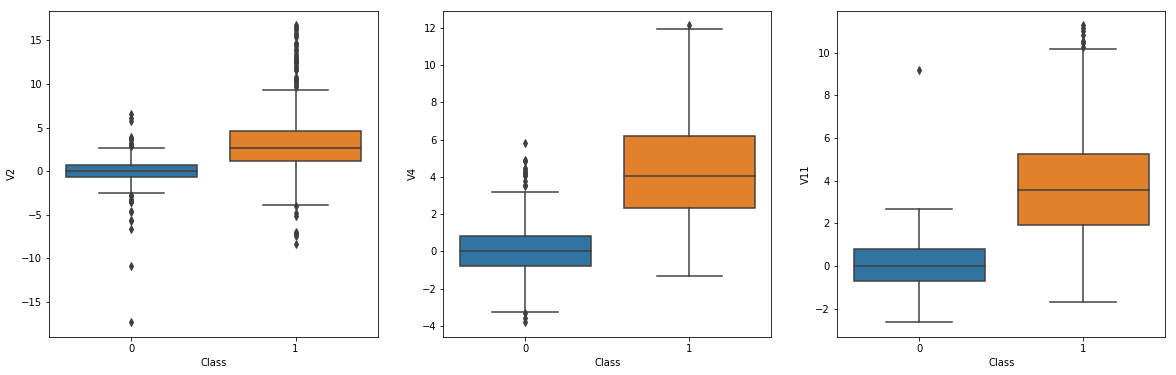

In [280]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x='Class',y='V2',ax=ax1, data=df)
sns.boxplot(x='Class',y='V4',ax=ax2, data=df)
sns.boxplot(x='Class',y='V11',ax=ax3, data=df)

Now as we have removed the outliners, we will go ahead with model building and training 

In [281]:
X = df.drop('Class', axis=1)
y = df['Class']

In [282]:
#Importing necesary classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [283]:
#Splitting the data into train - test for model evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [284]:
#Listing the different classifiers
model = [LogisticRegression(), KNeighborsClassifier(),SVC(), DecisionTreeClassifier()]

In [285]:
#Creating a function to avoid the repeatative work
def getscore (model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    s = model.score(X_test,y_test)
    print(model.__class__.__name__, 'Has test score of',round(s,2)*100, '% of accuracy')

In [286]:
for i in range(len(model)):
    classify = model[i]
    getscore(classify,X_train,y_train,X_test,y_test) 

LogisticRegression Has test score of 91.0 % of accuracy
KNeighborsClassifier Has test score of 92.0 % of accuracy
SVC Has test score of 91.0 % of accuracy
DecisionTreeClassifier Has test score of 94.0 % of accuracy


Use of test train split for Logistic Regression gives us the highest accuracy of predicting the credit fraud transaction

Now let us evaluate the models using cross validation technique 

# Cross Validation

In [287]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [288]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    score = cross_val_score(classifier, X, y, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score


Model evaluation using Cross Validation technique also shows that Logestic Regression Model predicts the best results for credit fraud transactions. 

# Parameter Tuning

In [289]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
logreg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
gridlog_reg = GridSearchCV(LogisticRegression(), logreg_params)
gridlog_reg.fit(X, y)
# We automatically get the logistic regression with the best parameters.
log_reg = gridlog_reg.best_estimator_


knears_params = {"n_neighbors": list(range(2,30,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X, y)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000] , 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],'gamma': [0.001, 0.01, 0.1, 1]}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X,y)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(2,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X, y)

# tree best estimator
tree_clf = grid_tree.best_estimator_

After getting the best parameters for the different classification models using GridSearchCV w will again perform cross validation to check which model performs better and give us the best results 

In [290]:
log_reg_score = cross_val_score(log_reg, X, y, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X, y, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X, y, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X, y, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.17%
Knears Neighbors Cross Validation Score 93.07%
Support Vector Classifier Cross Validation Score 94.21%
DecisionTree Classifier Cross Validation Score 92.97%


After parameter tuning we have seen that the SVC model gives us high accuracy then the other three models.

In [291]:
from sklearn.model_selection import cross_val_predict
log_reg_pred = cross_val_predict(log_reg, X, y, cv=5)
knears_pred = cross_val_predict(knears_neighbors, X,y,cv=5)
svc_pred=cross_val_predict(svc,X,y,cv=5)
tree_pred=cross_val_predict(tree_clf,X,y,cv=5)

# Model Evaluation Using ROC and AUC techniques

In [292]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y, tree_pred))

Logistic Regression:  0.9313140734909034
KNears Neighbors:  0.9299427510311661
Support Vector Classifier:  0.9415615533382395
Decision Tree Classifier:  0.9279381813825326


From above scores it can be seen that SVC has better performance in predicting the fraud transactions

In [293]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y, log_reg_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y, log_reg_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y,log_reg_pred )))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y, log_reg_pred)))

Recall Score: 0.90
Precision Score: 0.96
F1 Score: 0.93
Accuracy Score: 0.93


In [294]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y, svc_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y, svc_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y,svc_pred )))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y, svc_pred)))

Recall Score: 0.91
Precision Score: 0.97
F1 Score: 0.94
Accuracy Score: 0.94


In [295]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y, tree_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y, tree_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y,tree_pred )))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y, tree_pred)))

Recall Score: 0.88
Precision Score: 0.97
F1 Score: 0.92
Accuracy Score: 0.93


In [296]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score: {:.2f}'.format(recall_score(y, knears_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y, knears_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y,knears_pred )))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y, knears_pred)))

Recall Score: 0.88
Precision Score: 0.98
F1 Score: 0.93
Accuracy Score: 0.93


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


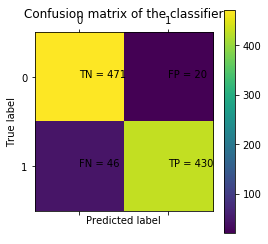

In [297]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

log_results = confusion_matrix(y, log_reg_pred)
plt.matshow(log_results)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(log_results[i][j]))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


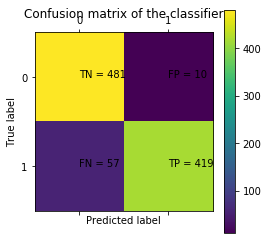

In [298]:
knears_results = confusion_matrix(y, knears_pred)
plt.matshow(knears_results)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(knears_results[i][j]))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


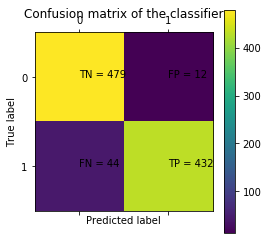

In [299]:
svc_results = confusion_matrix(y, svc_pred)
plt.matshow(svc_results)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(svc_results[i][j]))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


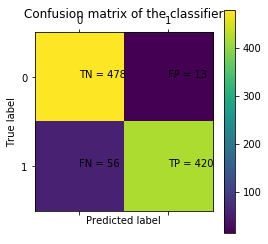

In [300]:
tree_results = confusion_matrix(y, tree_pred)
plt.matshow(tree_results)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(tree_results[i][j]))
plt.show()

Practically accuracy should not be the only parameter to decide on the model's performance. There are different other parameters on whic one can decide which model to select for the long run. In our case detecting a fraud transaction is a very important objective since it deals with a customers money.

As as per the confusion matrix False Negative is the parameter which we need to control , that is we need to look at Recall score for selecting the model.
So looking at the Confusion matrix above we can say that SVC model is better in predicting the fraud transaction. Compared to other three models.